In [1]:
#   Name: Teresa Ferrill
#   Date: 05/30/2020
# Course: DSC540-T302 Data Preparation
# Term Project: Milestone Five - Gun Violence

Merging Data and Storing in a Database then Visualizing that Data

Using a SQLite database, three datasets will be imported and systematically prepared and loaded into a database.  While loaded individually, these database tables will be merged together to support analysis.     
> The datasets contain information on how many people have been killed and injured from gun violence.  Analysis steps include:         
> - Prepare Datasets: the datasets will be imported, cleaned, and transformed for use in this notebook    
>> - Obtaining datasets within this notebook ensures most current data has been applied to the analysis
> - Establish the SQLite Database: each dataset will be imported into a database as individual tables    
>> - Analysis will drive the combination and creation of additional tables that combine data from these three tables   
>> - Initially, the database had four tables, at conclusion of analysis there are nine tables
>> - As a precaution, if any tables currently exist in the database, they will be deleted
> - Create Visualizations: multiple graphs will be prepared that represent analysis based on years, states, and those killed and injured    

Through analysis, a series of visualizations will be generated leveraging Matplotlib and NumPy.  The visualizations include:    
> - Two sets of bar graphs identifying those Killed and Injured as a result of Gun Violence over a period of years using two different datasets    
> - Line graph comparing number of deaths due to gun violence throughout the year across multiple years     
> - Multi-bar graph with Number Killed and Injured by Gun Violence From 2013 to 2018 by State, uses CSV and WEB datasets    
> - Stacked bar graph of the IL cities with the top counts of killed and injured (excluding Chicago), uses CSV, WEB, and API datasets
> - Two pie charts with total number of those killed and injured by year for years 2014 to 2018, uses CSV, WEB, and API datasets

In [2]:
# import libraries used within Notebook

# support for DataFrame processing
import pandas as pd
# support for arrays and matrices
import numpy as np
# database support
import sqlite3
# support web services
from bs4 import BeautifulSoup
# support URL processing
from urllib.request import Request, urlopen
# support for visualizations
import matplotlib.pyplot as plt
# support for JSON processing
import json 
# support for operation systems functions
import os

In [3]:
# common functions used to process datasets
# function to update state fields to state appreviations versus the state name
def updateStates(df):
    df['State'] = df.State.replace('Indiana', 'IN')
    df['State'] = df.State.replace('Wisconsin', 'WI')
    df['State'] = df.State.replace('New York', 'NY')
    df['State'] = df.State.replace('North Carolina', 'NC')
    df['State'] = df.State.replace('Florida', 'FL')
    df['State'] = df.State.replace('Tennessee', 'TN')
    df['State'] = df.State.replace('Texas', 'TX')
    df['State'] = df.State.replace('Maryland', 'MD')
    df['State'] = df.State.replace('Massachusetts', 'MA')
    df['State'] = df.State.replace('Mississippi', 'MS')
    df['State'] = df.State.replace('California', 'CA')
    df['State'] = df.State.replace('Michigan', 'MI')
    df['State'] = df.State.replace('South Carolina', 'SC')
    df['State'] = df.State.replace('Alaska', 'AK')
    df['State'] = df.State.replace('Illinois', 'IL')
    df['State'] = df.State.replace('Kentucky', 'KY')
    df['State'] = df.State.replace('Georgia', 'GA')
    df['State'] = df.State.replace('Pennsylvania', 'PA')
    df['State'] = df.State.replace('Virginia', 'VA')
    df['State'] = df.State.replace('Missouri', 'MO')
    df['State'] = df.State.replace('New Mexico', 'NM')
    df['State'] = df.State.replace('Louisiana', 'LA')
    df['State'] = df.State.replace('Ohio', 'OH')
    df['State'] = df.State.replace('District of Columbia', 'DC')
    df['State'] = df.State.replace('Washington', 'WA')
    df['State'] = df.State.replace('Utah', 'UT')
    df['State'] = df.State.replace('West Virginia', 'WV')
    df['State'] = df.State.replace('Iowa', 'IA')
    df['State'] = df.State.replace('Minnesota', 'MN')
    df['State'] = df.State.replace('Alabama', 'AL')
    df['State'] = df.State.replace('Montana', 'MT')
    df['State'] = df.State.replace('New Jersey', 'NJ')
    df['State'] = df.State.replace('Arkansas', 'AR')
    df['State'] = df.State.replace('Arizona', 'AZ')
    df['State'] = df.State.replace('Oklahoma', 'OK')
    df['State'] = df.State.replace('Kansas', 'KS')
    df['State'] = df.State.replace('Wyoming', 'WY')
    df['State'] = df.State.replace('Nevada', 'NV')
    df['State'] = df.State.replace('Oregon', 'OR')
    df['State'] = df.State.replace('Nebraska', 'NE')
    df['State'] = df.State.replace('Colorado', 'CO')
    df['State'] = df.State.replace('Connecticut', 'CT')
    df['State'] = df.State.replace('Delaware', 'DE')
    df['State'] = df.State.replace('Idaho', 'ID')
    df['State'] = df.State.replace('Maine', 'ME') 
    df['State'] = df.State.replace('Rhode Island', 'RI')
    df['State'] = df.State.replace('Hawaii', 'HI')
    df['State'] = df.State.replace('New Hampshire', 'NH')
    df['State'] = df.State.replace('North Dakota', 'ND')
    df['State'] = df.State.replace('South Dakota', 'SD')
    df['State'] = df.State.replace('Vermont', 'VT')
    
# function to support grouping of the cities in Illinios 
def updateCities(df):
    df['City'] = df.City.replace('Belleville (Shiloh)', 'Belleville')
    df['City'] = df.City.replace('Belleville (Swansea)', 'Belleville')
    df['City'] = df.City.replace('Benton (West City)', 'Benton')
    df['City'] = df.City.replace('Calumet City', 'Calumet')
    df['City'] = df.City.replace('Calumet Park', 'Calumet')
    df['City'] = df.City.replace('Carman (Gulfport)', 'Carman')
    df['City'] = df.City.replace('Carterville (Crainville)', 'Carterville')
    df['City'] = df.City.replace('Centralia (Central City)', 'Centralia')
    df['City'] = df.City.replace('Champaign (county)', 'Champaign')
    df['City'] = df.City.replace('Champaign County', 'Champaign')
    df['City'] = df.City.replace('Chicago (Burnham)', 'Chicago')
    df['City'] = df.City.replace('Chicago (Calumet Park)', 'Chicago')
    df['City'] = df.City.replace('Chicago (Chicago Lawn)', 'Chicago')
    df['City'] = df.City.replace('Chicago (Englewood)', 'Chicago')
    df['City'] = df.City.replace('Chicago (Hegewisch)', 'Chicago')
    df['City'] = df.City.replace('Chicago (Lakeview)', 'Chicago')
    df['City'] = df.City.replace('Chicago (Lincoln Park)', 'Chicago')
    df['City'] = df.City.replace('Chicago (Norridge)', 'Chicago')
    df['City'] = df.City.replace('Chicago (Roseland)', 'Chicago')
    df['City'] = df.City.replace('Chicago Heights', 'Chicago')
    df['City'] = df.City.replace('Chicago Heights (Ford Heights)', 'Chicago')
    df['City'] = df.City.replace('Chicago Heights (Lynwood)', 'Chicago')
    df['City'] = df.City.replace('Chicago Heights (Sauk Village)', 'Chicago')
    df['City'] = df.City.replace('Chicago Ridge', 'Chicago')
    df['City'] = df.City.replace('Collinsville (State Park Place)', 'Collinsville')
    df['City'] = df.City.replace('Dekalb (DeKalb)', 'Dekalb')
    df['City'] = df.City.replace('Des Plaines (Rosemont)', 'Des Plaines')
    df['City'] = df.City.replace('Dundee (East Dundee)', 'Dundee')
    df['City'] = df.City.replace('Dundee (West Dundee)', 'Dundee')
    df['City'] = df.City.replace('Dundee Township', 'Dundee')    
    df['City'] = df.City.replace('East Saint Louis (Alorton)', 'East Saint Louis') 
    df['City'] = df.City.replace('East Saint Louis (Cahokia)', 'East Saint Louis')
    df['City'] = df.City.replace('East Saint Louis (Centreville)', 'East Saint Louis')
    df['City'] = df.City.replace('East Saint Louis (East St Louis)', 'East Saint Louis')
    df['City'] = df.City.replace('East Saint Louis (Fairmont City)', 'East Saint Louis')
    df['City'] = df.City.replace('East Saint Louis (Sauget)', 'East Saint Louis')
    df['City'] = df.City.replace('East Saint Louis (Washingtn Park)', 'East Saint Louis')
    df['City'] = df.City.replace('East Saint Louis (Washington Pk)', 'East Saint Louis')
    df['City'] = df.City.replace('Effingham (Park Hills)', 'Effingham')
    df['City'] = df.City.replace('Elmwood Park', 'Elmwood')
    df['City'] = df.City.replace('Franklin (county)', 'Franklin')
    df['City'] = df.City.replace('Franklin County', 'Franklin')
    df['City'] = df.City.replace('Franklin Park', 'Franklin')
    df['City'] = df.City.replace('Granite City (Pontoon Beach)', 'Granite City')
    df['City'] = df.City.replace('Grayslake (Gages Lake)', 'Grayslake')
    df['City'] = df.City.replace('Hardin County', 'Hardin')
    df['City'] = df.City.replace('Harvey (Dixmoor)', 'Harvey')
    df['City'] = df.City.replace('Highland Park', 'Highland')
    df['City'] = df.City.replace('Kane (county)', 'Kane County')
    df['City'] = df.City.replace('Kankakee (county)', 'Kankakee')
    df['City'] = df.City.replace('La Grange (Countryside)', 'La Grange')
    df['City'] = df.City.replace('La Grange (Hodgkins)', 'La Grange')
    df['City'] = df.City.replace('Lake (county)', 'Lake County')
    df['City'] = df.City.replace('Lake Villa (Lindenhurst)', 'Lake Villa')
    df['City'] = df.City.replace('Lake Zurich (Long Grove)', 'Lake Zurich')
    df['City'] = df.City.replace('Lincolnwood (Chi)', 'Lincolnwood')
    df['City'] = df.City.replace('Lincolnwood (chi)', 'Lincolnwood')
    df['City'] = df.City.replace('Macon (county)', 'Macon')
    df['City'] = df.City.replace('Madison (county)', 'Madison')
    df['City'] = df.City.replace('Madison County', 'Madison')
    df['City'] = df.City.replace('Manhattan (Wilton Center)', 'Manhattan')
    df['City'] = df.City.replace('Marion (county)', 'Marion')
    df['City'] = df.City.replace('Marion County (county)', 'Marion')
    df['City'] = df.City.replace('Marshall (county)', 'Marshall')
    df['City'] = df.City.replace('Mc Clure (East Cape Girardeau)', 'Mc Clure')
    df['City'] = df.City.replace('Mc Clure (Mcclure)', 'Mc Clure')
    df['City'] = df.City.replace('Mc Leansboro (Mcleansboro)', 'Mc Leansboro')
    df['City'] = df.City.replace('McHenry (county)', 'McHenry')
    df['City'] = df.City.replace('Mchenry', 'McHenry')
    df['City'] = df.City.replace('Mchenry (Holiday Hills)', 'Mchenry')
    df['City'] = df.City.replace('Mchenry (county)', 'Mchenry')
    df['City'] = df.City.replace('Melrose Park (Northlake)', 'Melrose Park')
    df['City'] = df.City.replace('Midlothian (Crestwood)', 'Midlothian')
    df['City'] = df.City.replace('North Chicago', 'Chicago')
    df['City'] = df.City.replace('O Fallon (Shiloh)', 'O Fallon')
    df['City'] = df.City.replace("O'fallon", "O Fallon")
    df['City'] = df.City.replace('Peoria (Bartonville)', 'Peoria')
    df['City'] = df.City.replace('Peoria (West Peoria)', 'Peoria')
    df['City'] = df.City.replace('Peoria Heights', 'Peoria')
    df['City'] = df.City.replace('Riverside (North Riverside)', 'Riverside')
    df['City'] = df.City.replace('Rock Falls (Yeowardville)', 'Rock Falls')
    df['City'] = df.City.replace('Round Lake (Hainesville)', 'Round Lake')
    df['City'] = df.City.replace('Round Lake (Round Lake Beach)', 'Round Lake')
    df['City'] = df.City.replace('Round Lake (Round Lake Heights)', 'Round Lake')
    df['City'] = df.City.replace('Round Lake (Round Lake Park)', 'Round Lake')
    df['City'] = df.City.replace('Round Lake (Volo)', 'Round Lake')
    df['City'] = df.City.replace('Round Lake Beach', 'Round Lake')
    df['City'] = df.City.replace('Saint Charles (St Charles)', 'Saint Charles')
    df['City'] = df.City.replace('Saint Louis (Washington Park)', 'Saint Louis')
    df['City'] = df.City.replace('Springfield (Jerome)', 'Springfield')
    df['City'] = df.City.replace('Waukegan (Park City)', 'Waukegan')
    df['City'] = df.City.replace('West Chicago', 'Chicago')
    df['City'] = df.City.replace('West Frankfort', 'Frankfort')
    df['City'] = df.City.replace('Williamson (county)', 'Williamson County')
    df['City'] = df.City.replace('Willowbrook (Burr Ridge)', 'Willowbrook')
    df['City'] = df.City.replace('Winnebago (county)', 'Winnebago')
    df['City'] = df.City.replace('Winnebago County', 'Winnebago')
    df['City'] = df.City.replace('Woodstock (Bull Valley)', 'Woodstock')
    df['City'] = df.City.replace('Zion (Beach Park)', 'Zion')    

Prepare datasets - 'setters' and 'getters' have been established to support analysis     
- CSV data source – Gun Deaths in the US:           
> January 2013 – March 2018 from https://www.kaggle.com/jameslko/gun-violence-data/data
>> - Original dataset contained 239,677 rows and 29 columns    
>> - Final dataset contains 239,677 rows and 10 columns 
- Website data source – Gun Violence Archive:      
> May 2019 - May 2020 from https://www.gunviolencearchive.org/   
>> - Original WEB dataset contained 450 rows and 8 columns     
>> - Final WEB dataset contains 450 rows and 11 columns
- API data source – Gun Violence Data:     
> July 2015 to Novemberr 2016 from https://www.kaggle.com/duttadebadri/gun-violence-in-usa-insights-forecast    
>> - Original API dataset contained 500 rows and 7 columns     
>> - Final API dataset contains 498 rows and 9 columns.

CSV Data Source Preparation

In [4]:
# access CSV data source

# function to establish, or set, the csv dataset
def set_csv():
    # import csv file into DataFrame and review its contents    
    guns = pd.read_csv('gun-violence-data_01-2013_03-2018.csv')
    
    # report row and column count of raw dataset
    print('Original CSV dataset contained {} rows and {} columns.'.format(guns.shape[0], guns.shape[1]))
    
    # added header to row index column
    guns.index.name = 'Index'

    # renamed Unnamed column to Identifier
    guns = guns.rename(columns = {'Unnamed: 0':'Identifier'})
    guns = guns.rename(columns = {'incident_id':'Incident', 'date':'Date', 'state':'State', 'city_or_county':'City', 'address':'Address', 'n_killed':'Killed', 'n_injured':'Injured'})

    # drop un-needed columns using list of column names
    guns = guns.drop(['incident_url', 'source_url', 'incident_url_fields_missing','participant_age', 'participant_age_group', 'participant_gender', 'participant_name', 'participant_relationship', 'participant_status', 'participant_type','sources', 'state_house_district', 'state_senate_district'], axis=1)
    guns = guns.drop(['congressional_district', 'gun_stolen', 'gun_type','incident_characteristics', 'latitude', 'location_description', 'longitude', 'n_guns_involved', 'notes'], axis=1)

    # update state names in file
    updateStates(guns)
    
    # ensure all columns within the dataset are strings
    guns = guns.applymap(str)
    
    # add individual columns for month, day, and year
    guns['Month'] = guns['Date']
    guns['Day'] = guns['Date']
    guns['Year'] = guns['Date']
    
    # loop through DataFrame and update new columns with corresponding date portion
    # split the initial value on space and store the date portion appropriately
    for index, row in guns.iterrows():
        # split Date value on spaces, add to date list
        splitDate = row['Date'].split('-')
        
        # update Month column with 1st value in the string (Year)
        row['Year'] = splitDate[0]    
        
        # update Day column with 2nd value in the string (Month) 
        row['Month'] = splitDate[1]
        
        # update Year column with 3rd value in the string (Day)
        row['Day'] = splitDate[2]    
    
    # set numeric columns to interger data type
    guns['Incident'] = guns['Incident'].astype(int)
    guns['Killed'] = guns['Killed'].astype(int)
    guns['Injured'] = guns['Injured'].astype(int)
    guns['Month'] = guns['Month'].astype(int)
    guns['Year'] = guns['Year'].astype(int)
    guns['Day'] = guns['Day'].astype(int)
    
    # return the resulting dataset
    return guns

# set a variable containing the csv dataset DataFrame
csv_data = pd.DataFrame(set_csv())

# function to retrieve the csv DataFrame
def get_csv():    
    return csv_data

# print out final dataset size
print('Final CSV dataset contains {} rows and {} columns.'.format(csv_data.shape[0], csv_data.shape[1]))

Original CSV dataset contained 239677 rows and 29 columns.
Final CSV dataset contains 239677 rows and 10 columns.


Web Scrapping Data Source Preparation

In [5]:
# custom variables and functions to support web scrapping activities

# variables to support processing
# the mass-shooting table covers 18 pages
site = "https://www.gunviolencearchive.org/mass-shooting"
#site = "https://www.gunviolencearchive.org/reports/total-number-of-incidents?year=2017"

# list to hold table data
data = []

# list to hold href data that will become a field within the table
refsdata = []

# list to hold the table headers from the web table
table_headers = []

# using the user-agent tag, I am able to access the website 
# without HTTP Error 403: Forbidden
def get_hdr():
    hdr = {'User-Agent': 'Mozilla/5.0'}
    return hdr

# function to support reading the web page
def readPage(url):    
    # create request to open web page
    req = Request(url,headers=get_hdr())
        
    # open the web page
    page = urlopen(req)
    
    # read page using BeautifulSoup
    soup = BeautifulSoup(page)
    
    # return the soup page to calling function
    return soup

# function to read the table in the web page
def readTable(soup):

    # save table from soup page
    table = soup.find('table')
    
    # save body of table 
    table_body = table.find('tbody')
    
    # identify the rows within the table
    rows = table_body.find_all('tr')
    
    # loop through the rows and collect columns and html refence to incident details
    for row in rows:
        # save columns from row        
        cols = row.find_all('td')
        
        # strip off html from column elements within the cols list
        cols = [ele.text.strip() for ele in cols]
        
        # append columns to data list, illuminating empty values
        data.append([ele for ele in cols if ele]) 
        
        # capture the href values for information on incidents
        refs = row.find_all('li', {'class':"1 last"})
        
        # save href values into list
        refsdata.append(refs)
     
    # return data list to calling function
    return data

In [6]:
def set_web():
    # Start with reading web page and reviewing its contents
    
    # read start of table from 1st web page
    # fill data and refsdata lists
    readTable(readPage(site))
    
    # obtain soup page
    soup = readPage(site)
    
    # fill table_headers list using 'th' tag to be used as DataFrame headers
    for tx in soup.find_all('th'):
        table_headers.append(tx['column'])  
        
    # read 'next' pages through page range to obtain full table information
    # set counter variable to step through all pages containing the mass-shooting table
    counter = 1
    
    # loop through each page containing the web table
    for x in range(counter, 18):
        
        # read page then table, update data file     
        page = 'https://www.gunviolencearchive.org/mass-shooting?page=' + str(counter) 
        #page = 'https://www.gunviolencearchive.org/reports/total-number-of-incidents?page=' + str(counter) + '&year=2017'
        
        # print out the page after it is read (page 1 through page 17)
        #print('page: {}'.format(page))    
        
        # read table and set soup page
        readTable(readPage(page))
        
        # increment counter    
        counter += 1
        
    # turn table list into DataFrame using table headers as column headers
    df = pd.DataFrame(data,columns=table_headers)
    
    # report row and column count of raw dataset
    print('Original WEB dataset contained {} rows and {} columns.'.format(df.shape[0], df.shape[1]))
       
    # convert href's into strings for addition to table DataFrame 
    # and trim unnecessary tags from html
    
    # set counter for loop
    i=0
    
    # loop through href list 
    for i in range(i, len(refsdata)):
        
        # set each element in href list to a string
        refsdata[i] = str(refsdata[i])
        
        #clean string data - remove first 29 characters and last 39 characters
        refsdata[i] = refsdata[i][:-39]
        refsdata[i] = refsdata[i][29:]
        
        # increment counter
        i += 1
        
    # add list of string href values to the table dataset
        
    # set href list to a series
    se = pd.Series(refsdata)
    
    # use href series to add values to table DataFrame
    df['href'] = se.values
        
    # added header to row index column
    df.index.name = 'Index'
    
    # renamed column headers
    df = df.rename(columns = {'Base.IncidentID':'ID', 'Base.IncidentDate':'Date', 'Location.State':'State', 'Location.CityOrCounty':'City'})
    df = df.rename(columns = {'Location.Address': 'Address', 'Counts.NumberOfParticipantsKilled':'Killed'})
    df = df.rename(columns = {'Counts.NumberOfParticipantsInjured':'Injured', 'href':'HREF'})  
    
    # remove Base.IncidentOperations column
    del df['Base.IncidentOperations']
    
    # other data sources have information based on year separate from month and day
    # need to separate the date into month, day, and year
    
    # add columns for month, day, and year
    df['Month'] = df['Date']
    df['Day'] = df['Date']
    df['Year'] = df['Date']
    
    # loop through DataFrame and update new columns with corresponding date portion
    # split the initial value on space and store the date portion appropriately
    for index, row in df.iterrows():
        # split Date value on spaces, add to date list
        splitDate = row['Date'].split()
        
        # update Month column with 1st value in the string (Month)
        row['Month'] = splitDate[0]
        
        # update Day column with 2nd value in the string (Day) and remove the comma
        row['Day'] = splitDate[1][:-1]
        
        # update Year column with 3rd value in the string (Year)
        row['Year'] = splitDate[2]
        
    # convert Killed and Injured columns to numberic data type columns 
    df["Killed"] = pd.to_numeric(df["Killed"])    
    df["Injured"] = pd.to_numeric(df["Injured"])
    
    # update state column in DataFrame
    updateStates(df)
    
    # return resultsing DataFrame
    return df

# set a variable containing the web dataset DataFrame
web_data = set_web()

# function to retrieve the web dataset DataFrame
def get_web():
    return web_data

# print out final dataset size
print('Final WEB dataset contains {} rows and {} columns.'.format(web_data.shape[0], web_data.shape[1]))

Original WEB dataset contained 450 rows and 8 columns.
Final WEB dataset contains 450 rows and 11 columns.


API Data Source Preparation

In [7]:
# set variables for API Data Source
# prepare data for input to kaggle.json file, username and API key information
data = {"username":"teresaferrill","key":"49b613bbb9cda757a0bf942e8243bb76"}

In [8]:
# function to load the web page containing the interface
def load_page():
    # change current working directory to .kaggle
    os.chdir(".kaggle")
    # open kaggle.json file, write data with username and API key information to the file
    with open('kaggle.json', 'w') as outfile:
        json.dump(data, outfile)
    # change working directory back to original location    
    os.chdir("..\\")

In [9]:
# function to import the API library
def import_kaggle():
    # import the Kaggle API library to support authentication
    from kaggle.api.kaggle_api_extended import KaggleApi
    
    # establish Kaggle API
    api = KaggleApi(data)
    # authenticate to Kaggle site
    api.authenticate()
    # download the gun violence database from Kaggle
    !kaggle datasets download -d gunviolencearchive/gun-violence-database
    
    # import library to support zip packages
    from shutil import unpack_archive
    # unpack the gun violence database download
    unpack_archive('gun-violence-database.zip')    

In [10]:
# calls to functions for loading the webpage and importing the Kaggle API Library
load_page()
import_kaggle()

gun-violence-database.zip: Skipping, found more recently modified local copy (use --force to force download)


In [11]:
# function to create the API dataset
def set_api():
    # read the mass shootings file
    data = pd.read_csv('mass_shootings_all.csv')

    # report row and column count of raw dataset
    print('Original API dataset contained {} rows and {} columns.'.format(data.shape[0], data.shape[1]))

    # remove Operations column - no rows contain any data, column is unnecessary
    del data['Operations']
    
    # added header to row index column
    data.index.name = 'Index'
    
    # update column headers of DataFrame
    data = data.rename(columns = {'Incident Date':'Date', 'City Or County':'City', '# Killed':'Killed', '# Injured':'Injured'})
    
    # update state values to upper case two digit abbreviations 
    updateStates(data)
    
    # update Killed and Injured columns to string data type
    data.Killed = data.Killed.astype(str)
    data.Injured = data.Injured.astype(str)
    
    # add columns for month, day, and year
    data['Month'] = data['Date']
    data['Day'] = data['Date']
    data['Year'] = data['Date']
    
    # loop through DataFrame and update new columns with corresponding date portion
    # split the initial value on space and store the date portion appropriately
    for index, row in data.iterrows():
        # split Date value on spaces, add to date list
        splitDate = row['Date'].split()
        
        # update Month column with 1st value in the string (Month)
        row['Month'] = splitDate[0]
        
        # update Day column with 2nd value in the string (Day) and remove the comma
        row['Day'] = splitDate[1][:-1]
        
        # update Year column with 3rd value in the string (Year)
        row['Year'] = splitDate[2]
    
    # reset Killed and Injured columns to Integer data type
    data.Killed = data.Killed.astype(int)
    data.Injured = data.Injured.astype(int)
    
    # only two rows contain null addresses, can delete without impact to analysis
    # delete the rows with null or NaN value for Address
    data = data[data['Address'].notna()]
    
    return data

# set a variable containing the API dataset DataFrame 
api_data = set_api()

# function to retrieve the API DataFrame
def get_api():
    return api_data

# print out final dataset size
print('Final API dataset contains {} rows and {} columns.'.format(api_data.shape[0], api_data.shape[1]))

Original API dataset contained 500 rows and 7 columns.
Final API dataset contains 498 rows and 9 columns.


Establish SQLite DataBase - initially, the database will have 4 tables, at conclusion of analysis there will be 9

In [12]:
# set connection variable to connection to SQL lite database
con = sqlite3.connect('gunviolence.sqlite')

# establish cursor to use for executing queries
cursor = con.cursor()

In [13]:
# to ensure the database, if pre-existing, does not contain any additional or 'old' tables,
# will drop all existing tables

# function to delete existing table from gunviolence database
def drop_table(tablename):
    query = 'DROP TABLE IF EXISTS ' + tablename
    cursor = con.execute(query)
    
# cursor to obtain list of existing tables from gunviolence database, if there are any
query = 'SELECT name FROM sqlite_master WHERE type = "table"'
cursor = con.execute(query)

# capture tuple return from execute call
tablenames = [tup[0] for tup in cursor.fetchall()]

# if tables exist, drop them one by one
if(len(tablenames) > 0):
    for i in range(len(tablenames)): 
        drop_table(tablenames[i]) 

In [14]:
# create reference table for month
# dropping the table if it exists in order to ensure the code executes properly
cursor = con.execute('DROP table IF EXISTS Month')
query = """CREATE TABLE Month (num_month INTEGER, text_month VARCHAR(25))"""

# execute query to create table
cursor.execute(query);

In [15]:
# populate Month DataFrame to use to create Month table in database
month_df = pd.DataFrame({
    'num_month': ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'],
    'text_month': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
})

# create Month table in database
month_df.to_sql('Month', con, if_exists='replace', index = False)

>> Determine which years are reported in which dataset

In [16]:
# list unique years from the CSV DataFrame
(get_csv()).Year.unique()

array([2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

In [17]:
# list unique years from the WEB DataFrame
(get_web()).Year.unique()

array(['2020', '2019'], dtype=object)

In [18]:
# List unique years from the API DataFrame
(get_api()).Year.unique()

array(['2016', '2015'], dtype=object)

>> Estabalish database table for CSV Dataset, called gunsCSV - contains 239,677 rows and 10 columns

In [19]:
# Create gunsCSV table based on the CSV DataFrame
get_csv().to_sql('gunsCSV', con, if_exists='replace', index = False)

# verify creation by obtaining and printing count of the rows of the new table
cursor = con.execute('select count(*) from gunsCSV')
csv_count_lst = cursor.fetchall()
csv_count_lst

[(239677,)]

In [20]:
# Retrieve column information
# Every column will be represented by a tuple with the following attributes:
# (id, name, type, notnull, default_value, primary_key)
cursor.execute('PRAGMA TABLE_INFO("{}")'.format('gunsCSV'))

# capture tuple return from execute call
names = [tup[1] for tup in cursor.fetchall()]

# print out of column names
print(names)

['Incident', 'Date', 'State', 'City', 'Address', 'Killed', 'Injured', 'Month', 'Day', 'Year']


>> Estabalish database table for WEB Dataset, called gunsWEB - contains 450 rows and 11 columns

In [21]:
# Create gunsWEB table based on the CSV DataFrame
get_web().to_sql('gunsWEB', con, if_exists='replace', index = False)

# verify creation by obtaining and printing count of the rows of the new table
cursor = con.execute('select count(*) from gunsWEB')
web_count_lst = cursor.fetchall()
web_count_lst

[(450,)]

In [22]:
# Retrieve column information
# Every column will be represented by a tuple with the following attributes:
# (id, name, type, notnull, default_value, primary_key)
cursor.execute('PRAGMA TABLE_INFO("{}")'.format('gunsWEB'))

# capture tuple return from execute call
names = [tup[1] for tup in cursor.fetchall()]

# print out of column names
print(names)

['ID', 'Date', 'State', 'City', 'Address', 'Killed', 'Injured', 'HREF', 'Month', 'Day', 'Year']


>> Estabalish database table for API Dataset, called gunsWEB - contains 498 rows and 9 columns

In [23]:
# Create gunsAPI table based on the API DataFrame
get_api().to_sql('gunsAPI', con, if_exists='replace', index = False)

# verify creation by obtaining and printing count of the rows of the new table
cursor = con.execute('select count(*) from gunsAPI')
api_count_lst = cursor.fetchall()
api_count_lst

[(498,)]

In [24]:
# Retrieve column information
# Every column will be represented by a tuple with the following attributes:
# (id, name, type, notnull, default_value, primary_key)
cursor = con.execute('PRAGMA TABLE_INFO("{}")'.format('gunsAPI'))

# capture tuple return from execute call
names = [tup[1] for tup in cursor.fetchall()]

# print out of column names
print(names)

['Date', 'State', 'City', 'Address', 'Killed', 'Injured', 'Month', 'Day', 'Year']


> Initially, there are four tables in the database

In [25]:
# retrieve names of tables initially in the database
# generate query of metadata for gunviolence database
query = 'SELECT name from sqlite_master where type= "table"'

# execute query
cursor.execute(query)

# print results of query
print(cursor.fetchall())

[('Month',), ('gunsCSV',), ('gunsWEB',), ('gunsAPI',)]


Create (minimum of) 5 visualizations that demonstrate the data you have cleansed. You should have at least 2 visualizations that have data from more than one source.

> Visualization of number of those killed then Injured in gun violence between July 2015 and November 2016    
>> Using only the DataSet derived from the API Data Source    

In [26]:
# create query to select data on killed and injured between 2015 and 2016 using API data source
query = "SELECT Date, State, City, Address, Killed, Injured, Month, Day, Year, (SELECT num_month from MONTH WHERE text_month = gunsAPI.Month) as num_month, (SELECT (SELECT num_month from MONTH WHERE text_month = gunsAPI.Month) || ' ' || cast(Year as string)) AS Year_Month_Num, (SELECT Month || ' ' || cast(Year as string)) AS Year_Month FROM gunsAPI ORDER BY Year, num_Month"

# establish cursor to execute query
cursor = con.execute(query)

# capture list output from select query
api_list = cursor.fetchall()

# create DataFrame from query results and add column headers
api_df = pd.DataFrame(api_list)
api_df.columns=['Date', 'State', 'City', 'Address', 'Killed', 'Injured', 'Month', 'Day', 'Year', 'num_Month', 'Year_Month_Num', 'Year_Month']

# print first 10 rows of DataFrame
api_df.head(10)

,Date,State,City,Address,Killed,Injured,Month,Day,Year,num_Month,Year_Month_Num,Year_Month
0,"July 30, 2015",PA,Pittsburgh,Brushton Avenue,0,4,July,30,2015,07,07 2015,July 2015
1,"July 27, 2015",IL,Rockford,900 block of Kent Street,0,5,July,27,2015,07,07 2015,July 2015
2,"July 26, 2015",MO,Kansas City,Thompson and Colorado,2,3,July,26,2015,07,07 2015,July 2015
3,"July 26, 2015",LA,New Orleans,Piety and Treasure street,0,4,July,26,2015,07,07 2015,July 2015
4,"July 25, 2015",VA,Hopewell,500 block of N. 7th Ave,0,4,July,25,2015,07,07 2015,July 2015
5,"July 24, 2015",PA,Erie,200 block of West 29th Street,2,4,July,24,2015,07,07 2015,July 2015
6,"July 23, 2015",LA,Lafayette,3141 Johnson Street,3,9,July,23,2015,07,07 2015,July 2015
7,"July 22, 2015",GA,Suwanee,5500 block of Old Atlanta Road,5,0,July,22,2015,07,07 2015,July 2015
8,"July 21, 2015",FL,Miami Gardens,Northwest 25th Avenue and Miami Gardens Drive,1,3,July,21,2015,07,07 2015,July 2015
9,"August 30, 2015",TN,Memphis,3300 block of Sobota Circle,1,4,August,30,2015,08,08 2015,August 2015


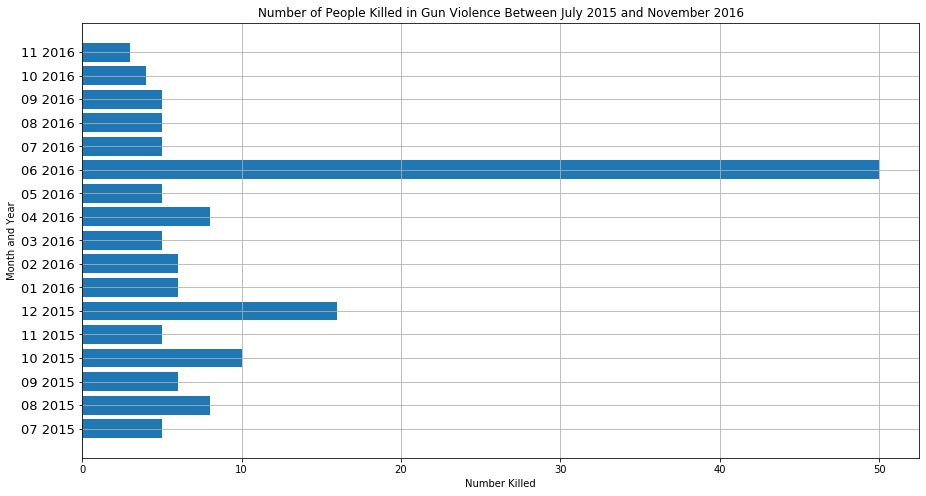

In [27]:
# create bar chart, set figure size
plt.figure(figsize=(15,8))

# identify plot as barchart, use count for x value
plt.barh(y=api_df['Year_Month_Num'], width=api_df['Killed'])

# set fountsize of the y values
plt.yticks(fontsize=13)

# establish plot labels and title
plt.ylabel("Month and Year")
plt.xlabel("Number Killed")
plt.title("Number of People Killed in Gun Violence Between July 2015 and November 2016")

# show the grid
plt.grid(True)

# print the plot
plt.show()

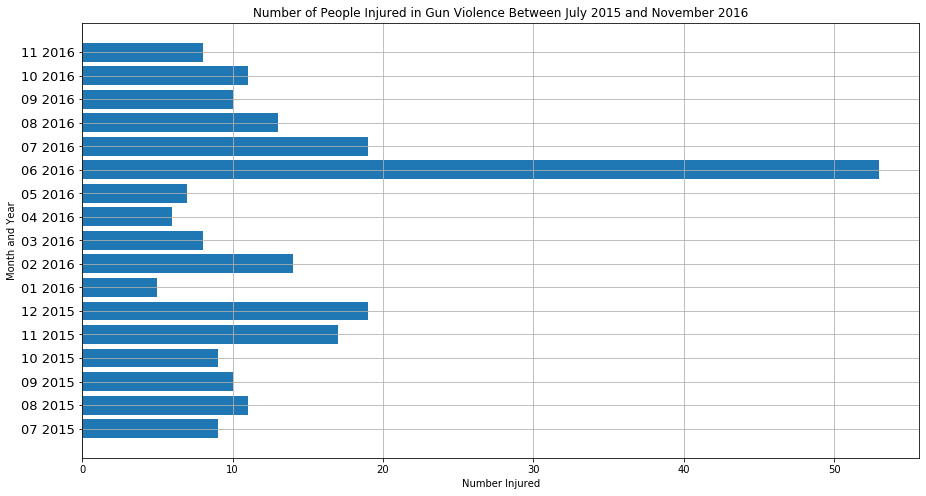

In [28]:
# create bar chart, set figure size
plt.figure(figsize=(15,8))

# identify plot as barchart, use count for x value
plt.barh(y=api_df['Year_Month_Num'], width=api_df['Injured'])

# set fountsize of the y values
plt.yticks(fontsize=13)

# establish labels and title
plt.ylabel("Month and Year")
plt.xlabel("Number Injured")
plt.title("Number of People Injured in Gun Violence Between July 2015 and November 2016")

# show the grid
plt.grid(True)

# print the plot
plt.show()

In [29]:
# summary of data used in the bar graphs
# query to pull data used
query = "SELECT sum(Killed) as sum_Killed, sum(Injured) as sum_Injured, (SELECT num_month from MONTH WHERE text_month = gunsAPI.Month) as num_month, (SELECT (SELECT num_month from MONTH WHERE text_month = gunsAPI.Month) || ' ' || cast(Year as string)) AS Year_Month_Num, (SELECT Month || ' ' || cast(Year as string)) AS Year_Month FROM gunsAPI GROUP BY Year_Month_Num ORDER BY Year, num_Month"

# establish cursor to execute the query
cursor = con.execute(query)

# create list for query results
api_sum = cursor.fetchall()

# create DataFrame containing query results, add column headers, and print first 10 rows of DataFrame
api_sum_df = pd.DataFrame(api_sum)
api_sum_df.columns=['sum_Killed', 'sum_Injured', 'num_Month', 'Year_Month_Num', 'Year_Month']
api_sum_df.head(10)

,sum_Killed,sum_Injured,num_Month,Year_Month_Num,Year_Month
0,13,36,07,07 2015,July 2015
1,45,155,08,08 2015,August 2015
2,28,131,09,09 2015,September 2015
3,17,90,10,10 2015,October 2015
4,34,103,11,11 2015,November 2015
5,26,90,12,12 2015,December 2015
6,22,36,01,01 2016,January 2016
7,42,108,02,02 2016,February 2016
8,20,81,03,03 2016,March 2016
9,41,115,04,04 2016,April 2016


> Visualization of number of those killed then Injured in gun violence between May 2019 and May 2020    
>> Using only the DataSet derived from the WEB Data Source

In [30]:
# set query to retreive data from database using the WEB DataSet
query = "SELECT Date, State, City, Address, Killed, Injured, Month, Day, Year, (SELECT num_month from MONTH WHERE text_month = gunsWEB.Month) as num_month, (SELECT (SELECT num_month from MONTH WHERE text_month = gunsWEB.Month) || ' ' || cast(Year as string)) AS Year_Month_Num, (SELECT Month || ' ' || cast(Year as string)) AS Year_Month FROM gunsWEB ORDER BY Year, num_Month"

# establish cursor to execute query
cursor = con.execute(query)

# capture results of SELECT query and load into DataFrame, add column headers, and print first 10 rows 
web_list = cursor.fetchall()
web_df = pd.DataFrame(web_list)
web_df.columns=['Date', 'State', 'City', 'Address', 'Killed', 'Injured', 'Month', 'Day', 'Year', 'num_Month', 'Year_Month_Num', 'Year_Month']
web_df.head(10)

,Date,State,City,Address,Killed,Injured,Month,Day,Year,num_Month,Year_Month_Num,Year_Month
0,"May 31, 2019",VA,Virginia Beach,2405 Courthouse Drive,13,4,May,31,2019,05,05 2019,May 2019
1,"May 31, 2019",CA,West Covina,306 N Hollow Ave,1,3,May,31,2019,05,05 2019,May 2019
2,"May 30, 2019",IL,Robbins,14000 block of Grace Ave,0,5,May,30,2019,05,05 2019,May 2019
3,"May 29, 2019",TX,Cleveland,26311 TX-321,3,2,May,29,2019,05,05 2019,May 2019
4,"May 29, 2019",LA,Reserve,300 block of Homewood Place,1,3,May,29,2019,05,05 2019,May 2019
5,"May 27, 2019",MO,Saint Louis,5900 block of Goodfellow Blvd,2,2,May,27,2019,05,05 2019,May 2019
6,"May 27, 2019",DC,Washington,1200 block of Sumner Rd SE,0,5,May,27,2019,05,05 2019,May 2019
7,"May 27, 2019",NJ,Trenton,100 block of Walnut St,1,5,May,27,2019,05,05 2019,May 2019
8,"May 26, 2019",DC,Washington,3509 Wheeler Rd SE,1,3,May,26,2019,05,05 2019,May 2019
9,"May 26, 2019",VA,La Crosse,800 block of Alvis Road,0,5,May,26,2019,05,05 2019,May 2019


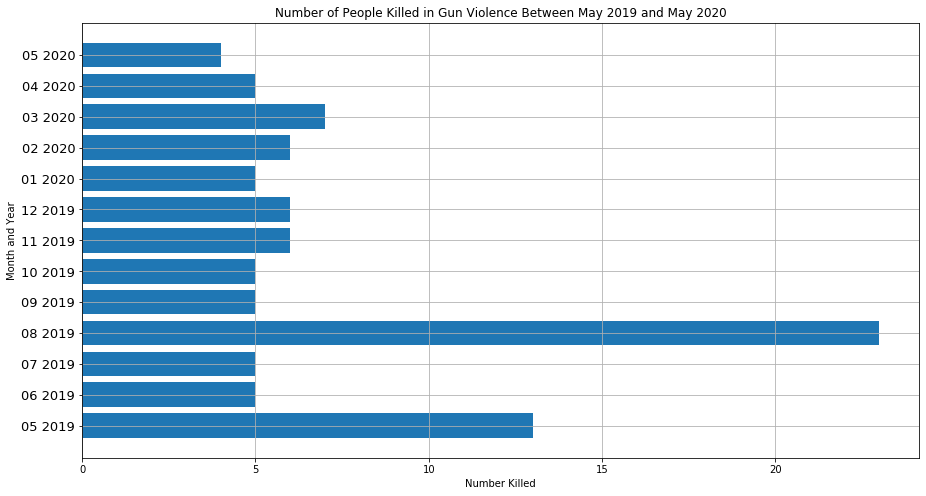

In [31]:
# create bar chart, set figure size
plt.figure(figsize=(15,8))

# identify plot as barchart, use count for x value
plt.barh(y=web_df['Year_Month_Num'], width=web_df['Killed'])

# set fountsize of the y values
plt.yticks(fontsize=13)

# create labels and title
plt.ylabel("Month and Year")
plt.xlabel("Number Killed")
plt.title("Number of People Killed in Gun Violence Between May 2019 and May 2020")

# show the grid
plt.grid(True)

# print the plot
plt.show()

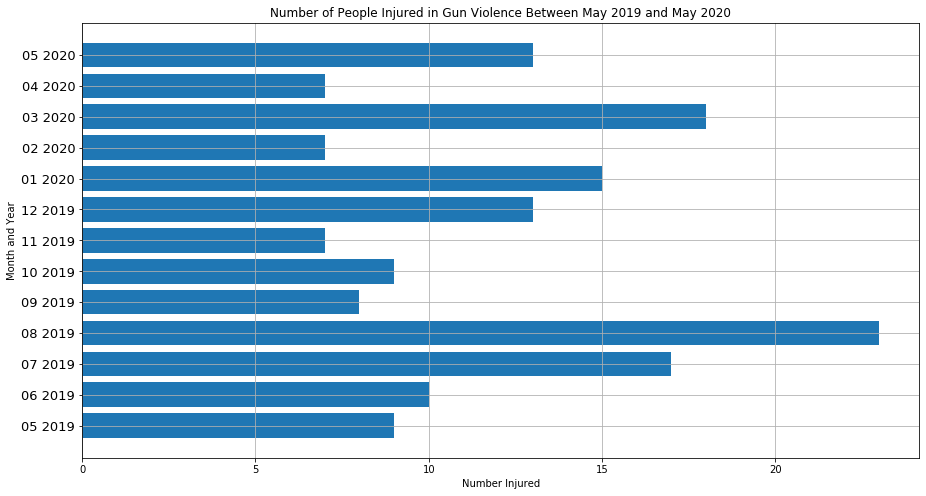

In [32]:
# create bar chart, set figure size
plt.figure(figsize=(15,8))

# identify plot as barchart, use count for x value
plt.barh(y=web_df['Year_Month_Num'], width=web_df['Injured'])

# set fountsize of the y values
plt.yticks(fontsize=13)

# create labels and title
plt.ylabel("Month and Year")
plt.xlabel("Number Injured")
plt.title("Number of People Injured in Gun Violence Between May 2019 and May 2020")

# show the grid
plt.grid(True)

# print the plot
plt.show()

In [33]:
# summary of data used in the bar graphs
# query to pull data used
query = "SELECT sum(Killed) as sum_Killed, sum(Injured) as sum_Injured, (SELECT num_month from MONTH WHERE text_month = gunsWEB.Month) as num_month, (SELECT (SELECT num_month from MONTH WHERE text_month = gunsWEB.Month) || ' ' || cast(Year as string)) AS Year_Month_Num, (SELECT Month || ' ' || cast(Year as string)) AS Year_Month FROM gunsWEB GROUP BY Year_Month_Num ORDER BY Year, num_Month"

# establish cursor to execute query
cursor = con.execute(query)

# capture results of SELECT query
web_sum = cursor.fetchall()

# create DataFrame from query results, add column headers, and print first 10 rows
web_sum_df = pd.DataFrame(web_sum)
web_sum_df.columns=['sum_Killed', 'sum_Injured', 'num_Month', 'Year_Month_Num', 'Year_Month']
web_sum_df.head(10)

,sum_Killed,sum_Injured,num_Month,Year_Month_Num,Year_Month
0,43,136,05,05 2019,May 2019
1,37,225,06,06 2019,June 2019
2,33,183,07,07 2019,July 2019
3,70,209,08,08 2019,August 2019
4,46,115,09,09 2019,September 2019
5,48,124,10,10 2019,October 2019
6,27,129,11,11 2019,November 2019
7,37,156,12,12 2019,December 2019
8,31,104,01,01 2020,January 2020
9,27,73,02,02 2020,February 2020


> Visualization of number of deaths as a result of gun violence between 2014 and 2017     
>> - Using only the DataSet derived from the CSV Data Source    
>> - Query excludes 2013 and 2018 as these years are incomplete within the dataset

In [34]:
# prepare query to support visualization
query = 'SELECT Year, Month, sum(Killed) FROM gunsCSV  WHERE YEAR > 2013 AND YEAR < 2018 GROUP BY Year, Month'

# execute query, fill cursor
cursor = con.execute(query)

# retrieve results of query in list
csv_killed_month = cursor.fetchall()

# create DataFrame from query results, add column headers to DataFrame, and print first 10 rows
csv_killed_month_df = pd.DataFrame(csv_killed_month)
csv_killed_month_df.columns = ['Year', 'Month', 'sum_Killed']
csv_killed_month_df.head(10)

,Year,Month,sum_Killed
0,2014,1,1070
1,2014,2,845
2,2014,3,1007
3,2014,4,979
4,2014,5,1099
5,2014,6,1127
6,2014,7,1162
7,2014,8,1140
8,2014,9,1013
9,2014,10,1012


In [35]:
# prepare DataFrame with pivot table of query results, print first 10 rows
csv_killed_month_df = pd.pivot_table(csv_killed_month_df,index=["Month", "Year"])
csv_killed_month_df.head(10)

sum_Killed
Month Year            
1     2014        1070
      2015        1123
      2016        1139
      2017        1356
2     2014         845
      2015         870
      2016         984
      2017        1141
3     2014        1007
      2015        1090

>> Line Graph based on Pivot Table using CSV Dataset

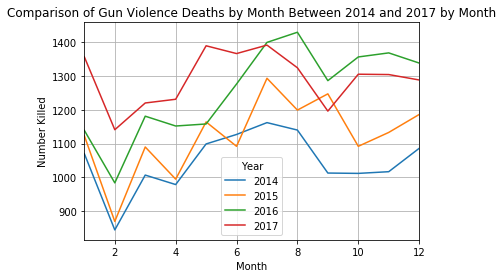

In [36]:
# create line graph comparing number of deaths due to gun violence 
csv_killed_month_df.pivot_table('sum_Killed', index='Month', columns='Year').plot()

# add grid to plot, add label and title
plt.grid(True)
plt.ylabel('Number Killed')
plt.title('Comparison of Gun Violence Deaths by Month Between 2014 and 2017 by Month');

>Visualization of number of those killed as a result of gun violence between 2013 and December 2020           
>>Using two datasets, from the CSV and WEB Data Source 

In [37]:
# prepare union query to combine CSV and WEB data sources
# adding columns to assist with analysis
query = ('SELECT Date, State, City, Address, Killed, Injured, Month, Day, Year, '
'(SELECT num_month from MONTH WHERE num_month = gunscsv.Month) AS num_month, '
'(SELECT (SELECT num_month from MONTH WHERE num_month = gunscsv.Month) || " " || cast(Year as string)) AS Year_Month_Num, '
'(SELECT (SELECT text_month from MONTH WHERE num_month = gunscsv.Month) || " " || cast(Year as string)) AS Year_Month FROM gunsCSV '
'UNION ALL '
'SELECT Date, State, City, Address, Killed, Injured, Month, Day, Year, '
'(SELECT num_month from MONTH WHERE text_month = gunsWEB.Month) AS num_month, '
'(SELECT (SELECT num_month from MONTH WHERE text_month = gunsWEB.Month) || " " || cast(Year as string)) AS Year_Month_Num, '
'(SELECT Month || " " || cast(Year as string)) AS Year_Month FROM gunsWEB ORDER BY Year, Month')

# load cursor with query results
cursor = con.execute(query)

# retrieve results of query, load DataFrame with the results, add column headers to DataFrame, and print first 10 rows
csv_web = cursor.fetchall()
csv_web_df = pd.DataFrame(csv_web)
csv_web_df.columns=['Date', 'State', 'City', 'Address', 'Killed', 'Injured', 'Month', 'Day', 'Year', 'num_Month', 'Year_Month_Num', 'Year_Month']
csv_web_df.head(10)

,Date,State,City,Address,Killed,Injured,Month,Day,Year,num_Month,Year_Month_Num,Year_Month
0,2013-01-01,PA,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,1,1,2013,01,01 2013,January 2013
1,2013-01-01,CA,Hawthorne,13500 block of Cerise Avenue,1,3,1,1,2013,01,01 2013,January 2013
2,2013-01-01,OH,Lorain,1776 East 28th Street,1,3,1,1,2013,01,01 2013,January 2013
3,2013-01-05,CO,Aurora,16000 block of East Ithaca Place,4,0,1,5,2013,01,01 2013,January 2013
4,2013-01-07,NC,Greensboro,307 Mourning Dove Terrace,2,2,1,7,2013,01,01 2013,January 2013
5,2013-01-07,OK,Tulsa,6000 block of South Owasso,4,0,1,7,2013,01,01 2013,January 2013
6,2013-01-19,NM,Albuquerque,2806 Long Lane,5,0,1,19,2013,01,01 2013,January 2013
7,2013-01-21,LA,New Orleans,LaSalle Street and Martin Luther King Jr. Boul...,0,5,1,21,2013,01,01 2013,January 2013
8,2013-01-21,CA,Brentwood,1100 block of Breton Drive,0,4,1,21,2013,01,01 2013,January 2013
9,2013-01-23,MD,Baltimore,1500 block of W. Fayette St.,1,6,1,23,2013,01,01 2013,January 2013


In [38]:
# prepare data set of DataFrame grouped by State, print first 10 rows
csv_web_df_state = csv_web_df.groupby(['State']).sum()
csv_web_df_state.head(10)

,Killed,Injured
State,,
AK,267,329
AL,1896,3035
AR,773,1356
AZ,1094,1101
CA,5616,7827
CO,796,1151
CT,343,1279
DC,463,1444
DE,218,857


In [39]:
# construct query to obtain total counts of those killed and injured by State from the CSV dataset
query = 'SELECT State, sum(Killed), sum(Injured) FROM gunsCSV GROUP BY State ORDER BY State'

# load cursor with results of query and obtain results
cursor = con.execute(query)
csv_summed_state = cursor.fetchall()

# load DataFrame with cursor and add column headers
csv_summed_state_df = pd.DataFrame(csv_summed_state)
csv_summed_state_df.columns = ['State', 'sum_Killed', 'sum_Injured']

# construct query to obtain total counts of those killed and injured by State from WEB dataset
query = 'SELECT State, sum(Killed), sum(Injured) FROM gunsWEB GROUP BY State ORDER BY State'

# load cursor with results of query and obtain results
cursor = con.execute(query)
web_summed_state = cursor.fetchall()

# load DataFrame with cursor and add column headers
web_summed_state_df = pd.DataFrame(web_summed_state)
web_summed_state_df.columns = ['State', 'sum_Killed', 'sum_Injured']

In [40]:
# review DataFrame from CSV dataset, print first 10 rows
csv_summed_state_df.head(10)

,State,sum_Killed,sum_Injured
0,AK,267,325
1,AL,1880,2998
2,AR,773,1347
3,AZ,1094,1096
4,CA,5562,7644
5,CO,796,1133
6,CT,341,1258
7,DC,459,1415
8,DE,217,853
9,FL,3909,7072


In [41]:
# review DataFrame from WEB dataset, print first 10 rows
web_summed_state_df.head(10)

,State,sum_Killed,sum_Injured
0,AK,0,4
1,AL,16,37
2,AR,0,9
3,AZ,0,5
4,CA,54,183
5,CO,0,18
6,CT,2,21
7,DC,4,29
8,DE,1,4
9,FL,15,70


In [42]:
# create webSUM database table from WEB DataFrame
web_summed_state_df.to_sql('webSUM', con, if_exists='replace', index = False)

# create query to select all rows from the webSUM table
query = 'SELECT * FROM webSUM ORDER BY State'

# load cursor with results of query then retrieve results
cursor = con.execute(query)
web_summed_state_DB = cursor.fetchall()

# create DataFrame from query, add column headers, and print first 10 rows
web_summed_state_DB_df = pd.DataFrame(web_summed_state_DB)
web_summed_state_DB_df.columns = ['State', 'sum_Killed', 'sum_Injured']
web_summed_state_DB_df.head(10)

,State,sum_Killed,sum_Injured
0,AK,0,4
1,AL,16,37
2,AR,0,9
3,AZ,0,5
4,CA,54,183
5,CO,0,18
6,CT,2,21
7,DC,4,29
8,DE,1,4
9,FL,15,70


In [43]:
# create database table using the CSV DataFrame
csv_summed_state_df.to_sql('csvSUM', con, if_exists='replace', index = False)

# create query to select all rows from the csvSUM table
query = 'SELECT * FROM csvSUM ORDER BY State'

# load cursor with query results and retrieve results
cursor = con.execute(query)
csv_summed_state_DB = cursor.fetchall()

# create DataFrame from query, add column headers, and print first 10 rows
csv_summed_state_DB_df = pd.DataFrame(csv_summed_state_DB)
csv_summed_state_DB_df.columns = ['State', 'sum_Killed', 'sum_Injured']
csv_summed_state_DB_df.head(10)

,State,sum_Killed,sum_Injured
0,AK,267,325
1,AL,1880,2998
2,AR,773,1347
3,AZ,1094,1096
4,CA,5562,7644
5,CO,796,1133
6,CT,341,1258
7,DC,459,1415
8,DE,217,853
9,FL,3909,7072


In [44]:
# create query to inner join the csvSUM and webSUM tables on State
query = ('SELECT c.State, (c.sum_Killed + w.sum_Killed) as Killed, (c.sum_Injured + w.sum_Injured) as Injured '
         'FROM csvSUM c '
         'INNER JOIN webSUM w ON c.State = w.State GROUP BY c.State')

# load cursor with query results and retrieve results
cursor = con.execute(query)
csv_web_sum = cursor.fetchall()

# create DataFrame with query results, add column headers, and print first 10 rows
csv_web_sum_df = pd.DataFrame(csv_web_sum)
csv_web_sum_df.columns = ['State', 'Killed', 'Injured']
csv_web_sum_df.head(10)

,State,Killed,Injured
0,AK,267,329
1,AL,1896,3035
2,AR,773,1356
3,AZ,1094,1101
4,CA,5616,7827
5,CO,796,1151
6,CT,343,1279
7,DC,463,1444
8,DE,218,857
9,FL,3924,7142


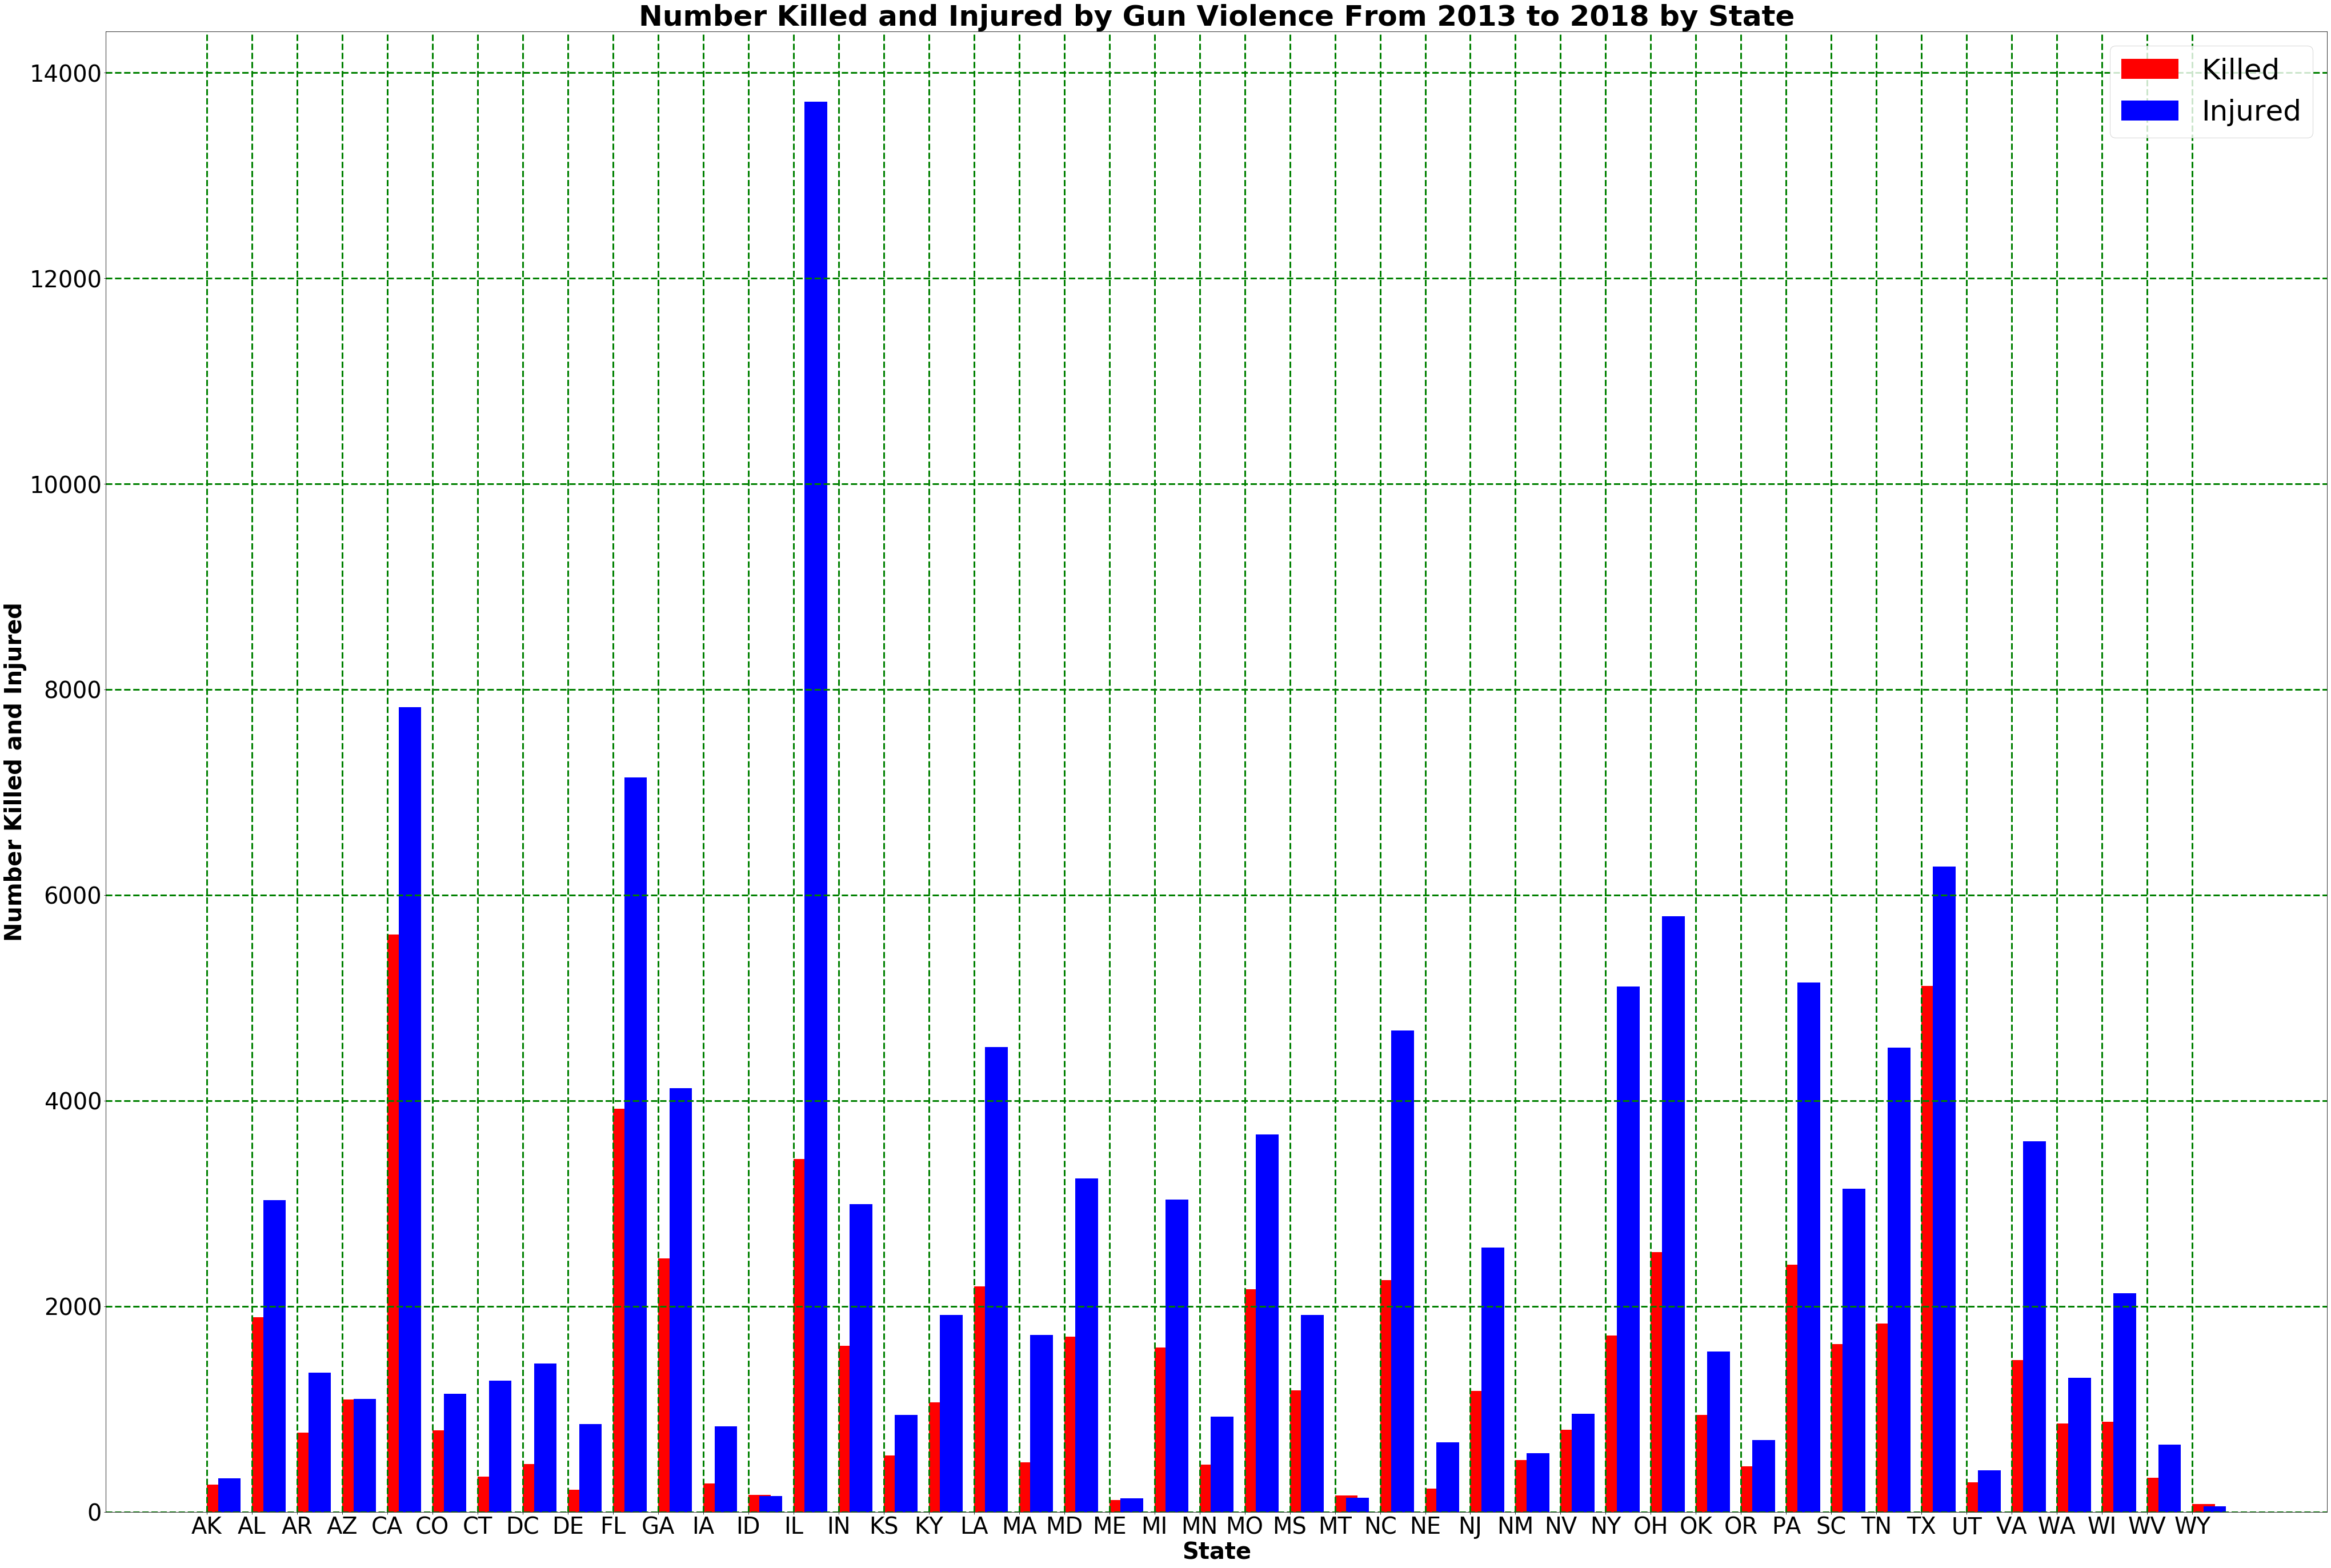

In [45]:
# build multi-bar graph using CSV and WEB summary table database query results
# identify index to be used in graph, establish x axis range
index = csv_web_sum_df.index
N = len(index) 
X = np.arange(N)

# identify figure and establish its parameters 
fig = plt.figure()
barWidth = 0.50
ax = fig.add_axes([1,1,9,9])

# identify the bars within the graph
ax.bar(X + 0.25, csv_web_sum_df['Killed'], color = 'r', width = 0.50)
ax.bar(X + 0.50, csv_web_sum_df['Injured'], color = 'b', width = 0.50)

# add labels and tick marks for x and y axis
ax.set_xticklabels(csv_web_sum_df['State'])
plt.xlabel('State', fontweight='bold', fontsize = 40)
plt.xticks([(r + barWidth -.5) for r in range(N)], csv_web_sum_df.State, fontsize = 40)
plt.ylabel('Number Killed and Injured', fontweight='bold', fontsize = 40)
plt.yticks(fontsize = 40)

# set plot grid colors and line style
plt.grid(color='g', linestyle='--', linewidth = 3)

# set title and legend
plt.title('Number Killed and Injured by Gun Violence From 2013 to 2018 by State', fontweight = 'bold', fontsize = 50)
plt.legend(['Killed', 'Injured'], fontsize=50);

> With such a huge number of injured in Illinois, conduct research by city in that state   
>> Combine information from all three datasets from the database into single data source for this analysis     
>> - Resulting dataset contains 240,625 rows with 12 columns

In [46]:
# build query to combine all rows from all dataset tables
query = ('SELECT Date, State, City, Address, Killed, Injured, Month, Day, Year, '
'(SELECT num_month from MONTH WHERE num_month = gunsCSV.Month) AS num_month, '
'(SELECT (SELECT num_month from MONTH WHERE num_month = gunsCSV.Month) || " " || cast(Year as string)) AS Year_Month_Num, '
'(SELECT (SELECT text_month from MONTH WHERE num_month = gunsCSV.Month) || " " || cast(Year as string)) AS Year_Month FROM gunsCSV '
'UNION ALL '
'SELECT Date, State, City, Address, Killed, Injured, Month, Day, Year, '
'(SELECT num_month from MONTH WHERE text_month = gunsWEB.Month) AS num_month, '
'(SELECT (SELECT num_month from MONTH WHERE text_month = gunsWEB.Month) || " " || cast(Year as string)) AS Year_Month_Num, '
'(SELECT Month || " " || cast(Year as string)) AS Year_Month FROM gunsWEB '
'UNION ALL '
'SELECT Date, State, City, Address, Killed, Injured, Month, Day, Year, '
'(SELECT num_month from MONTH WHERE num_month = gunsAPI.Month) AS num_month, '
'(SELECT (SELECT num_month from MONTH WHERE num_month = gunsAPI.Month) || " " || cast(Year as string)) AS Year_Month_Num, '
'(SELECT (SELECT text_month from MONTH WHERE num_month = gunsAPI.Month) || " " || cast(Year as string)) AS Year_Month FROM gunsAPI '
'ORDER BY Year, Month')

# load cursor with results of query, retrieve results
cursor = con.execute(query)
all_rows = cursor.fetchall()

# create DataFrame with results, add column headers, and print first 10 rows
all_rows_df = pd.DataFrame(all_rows)
all_rows_df.columns=['Date', 'State', 'City', 'Address', 'Killed', 'Injured', 'Month', 'Day', 'Year', 'num_Month', 'Year_Month_Num', 'Year_Month']
all_rows_df.head(10)

,Date,State,City,Address,Killed,Injured,Month,Day,Year,num_Month,Year_Month_Num,Year_Month
0,2013-01-01,PA,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,1,1,2013,01,01 2013,January 2013
1,2013-01-01,CA,Hawthorne,13500 block of Cerise Avenue,1,3,1,1,2013,01,01 2013,January 2013
2,2013-01-01,OH,Lorain,1776 East 28th Street,1,3,1,1,2013,01,01 2013,January 2013
3,2013-01-05,CO,Aurora,16000 block of East Ithaca Place,4,0,1,5,2013,01,01 2013,January 2013
4,2013-01-07,NC,Greensboro,307 Mourning Dove Terrace,2,2,1,7,2013,01,01 2013,January 2013
5,2013-01-07,OK,Tulsa,6000 block of South Owasso,4,0,1,7,2013,01,01 2013,January 2013
6,2013-01-19,NM,Albuquerque,2806 Long Lane,5,0,1,19,2013,01,01 2013,January 2013
7,2013-01-21,LA,New Orleans,LaSalle Street and Martin Luther King Jr. Boul...,0,5,1,21,2013,01,01 2013,January 2013
8,2013-01-21,CA,Brentwood,1100 block of Breton Drive,0,4,1,21,2013,01,01 2013,January 2013
9,2013-01-23,MD,Baltimore,1500 block of W. Fayette St.,1,6,1,23,2013,01,01 2013,January 2013


>> Add resulting dataset to database as table     
>> - Table contains 240,625 rows with 12 columns

In [47]:
# create gunsALL table in database to hold data from all three datasets
all_rows_df.to_sql('gunsALL', con, if_exists='replace', index = False)

In [48]:
# query gunsALL table to select data
query = 'SELECT Date, State, City, Address, Killed, Injured, Month, Day, Year, num_Month, Year_Month_Num, Year_Month FROM gunsALL'

# load cursor with query results, retrieve results
cursor = con.execute(query)
guns_all = cursor.fetchall()

# create DataFrame with results, add column headers, and print first 10 rows
guns_all_df = pd.DataFrame(guns_all)
guns_all_df.columns = ['Date', 'State', 'City', 'Address', 'Killed', 'Injured', 'Month', 'Day', 'Year', 'num_Month', 'Year_Month_Num', 'Year_Month']
guns_all_df.head(10)

,Date,State,City,Address,Killed,Injured,Month,Day,Year,num_Month,Year_Month_Num,Year_Month
0,2013-01-01,PA,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,1,1,2013,01,01 2013,January 2013
1,2013-01-01,CA,Hawthorne,13500 block of Cerise Avenue,1,3,1,1,2013,01,01 2013,January 2013
2,2013-01-01,OH,Lorain,1776 East 28th Street,1,3,1,1,2013,01,01 2013,January 2013
3,2013-01-05,CO,Aurora,16000 block of East Ithaca Place,4,0,1,5,2013,01,01 2013,January 2013
4,2013-01-07,NC,Greensboro,307 Mourning Dove Terrace,2,2,1,7,2013,01,01 2013,January 2013
5,2013-01-07,OK,Tulsa,6000 block of South Owasso,4,0,1,7,2013,01,01 2013,January 2013
6,2013-01-19,NM,Albuquerque,2806 Long Lane,5,0,1,19,2013,01,01 2013,January 2013
7,2013-01-21,LA,New Orleans,LaSalle Street and Martin Luther King Jr. Boul...,0,5,1,21,2013,01,01 2013,January 2013
8,2013-01-21,CA,Brentwood,1100 block of Breton Drive,0,4,1,21,2013,01,01 2013,January 2013
9,2013-01-23,MD,Baltimore,1500 block of W. Fayette St.,1,6,1,23,2013,01,01 2013,January 2013


In [49]:
# generate query to obtain rows from gunsAll table for the state of IL
query = 'SELECT Year, City, Killed, Injured, num_Month, Year_Month_Num, Year_Month from gunsALL WHERE State = "IL" ORDER BY CITY'

# load cursor with query results and retrieve results
cursor = con.execute(query)
guns_IL = cursor.fetchall()

# create DataFrame from results, add column headers, print first 10 rows
guns_IL_df = pd.DataFrame(guns_IL)
guns_IL_df.columns = ['Year', 'City', 'Killed', 'Injured', 'num_Month', 'Year_Month_Num', 'Year_Month']
guns_IL_df.head(10)

,Year,City,Killed,Injured,num_Month,Year_Month_Num,Year_Month
0,2014,Addison,0,1,10,10 2014,October 2014
1,2017,Addison,2,0,05,05 2017,May 2017
2,2014,Albany,0,0,02,02 2014,February 2014
3,2015,Algonquin,0,0,01,01 2015,January 2015
4,2017,Algonquin,0,1,10,10 2017,October 2017
5,2014,Alorton,1,0,10,10 2014,October 2014
6,2014,Alorton,0,1,12,12 2014,December 2014
7,2015,Alorton,0,1,03,03 2015,March 2015
8,2017,Alsip,1,1,09,09 2017,September 2017
9,2017,Alsip,0,1,11,11 2017,November 2017


In [50]:
# update cities within DataFrame to group metropolitan areas and correct misspellings, etc. 
updateCities(guns_IL_df)

In [51]:
# use DataFrame to create gunsIL table
guns_IL_df.to_sql('gunsIL', con, if_exists='replace', index = False)

In [52]:
# generate query to verify gunsIL table
query = 'SELECT COUNT(*) FROM gunsIL'

# load cursor with query results, retrieve results, and obtain count of query rows
cursor = con.execute(query)
guns_IL_count = cursor.fetchall()
guns_IL_count

[(17657,)]

In [53]:
# generate query to sum killed and injured by city from gunsIL table, ordered by most number killed, injured then by city
query = 'SELECT City, sum(Killed) as sum_Killed, sum(Injured) as sum_Injured FROM gunsIL GROUP BY City ORDER BY sum_Killed DESC, sum_Injured DESC, City'

# load cursor with query results, retrieve results
cursor = con.execute(query)
guns_IL_city = cursor.fetchall()

# create DataFrame using results, add column headers, print first 10 rows
guns_IL_city_df = pd.DataFrame(guns_IL_city)
guns_IL_city_df.columns = ['City', 'sum_Killed', 'sum_Injured']
guns_IL_city_df.head(10)

,City,sum_Killed,sum_Injured
0,Chicago,2378,11547
1,East Saint Louis,92,58
2,Rockford,79,414
3,Joliet,46,96
4,Peoria,41,297
5,Springfield,39,113
6,Aurora,30,89
7,Champaign,27,85
8,Danville,26,67
9,Decatur,23,81


In [54]:
# generate query to review cities in the gunsIL table
query = 'SELECT count(DISTINCT City) FROM gunsIL'

# load cursor query results, retrieved results, obtain row count
cursor = con.execute(query)
city_count = cursor.fetchall()
city_count

[(485,)]

In [55]:
# create gunsILCity table in database using the DataFrame containing cities, sum killed, and sum injured
guns_IL_city_df.to_sql('gunsILCity', con, if_exists='replace', index = False)

In [56]:
# generate query to verify gunsILCity
query = 'SELECT COUNT(*) FROM gunsILCity'

# load cursor with query results, retrieve results, and print out table row count
cursor = con.execute(query)
guns_IL_city_count = cursor.fetchall()
guns_IL_city_count

[(485,)]

>> - With high number of killed and injured in the Chicago area, removing Chicago from analysis
>> - Analysis will be on the next 20 cities with highest killed and injured count

In [57]:
# generate query to obtain only those IL cities with number killed and injured is above zero
# leave off Chicago and order by highest number killed, injured, and city
query = 'SELECT City, sum_Killed, sum_Injured FROM gunsILCity WHERE sum_Killed > 0 AND sum_Injured > 0 AND City <> "Chicago" ORDER BY sum_Killed DESC, sum_Injured DESC, City'

# load cursor with query results, retrieve results
cursor = con.execute(query)
guns_IL_city_sum = cursor.fetchall()

# create DataFrame, add column headers, print first 10 rows
guns_IL_city_sum_df = pd.DataFrame(guns_IL_city_sum)
guns_IL_city_sum_df.columns = ['City', 'Killed', 'Injured']
guns_IL_city_sum_df.head(10)

,City,Killed,Injured
0,East Saint Louis,92,58
1,Rockford,79,414
2,Joliet,46,96
3,Peoria,41,297
4,Springfield,39,113
5,Aurora,30,89
6,Champaign,27,85
7,Danville,26,67
8,Decatur,23,81
9,Calumet,22,33


In [58]:
# create new DataFrame with the twenty highest killed/injured count
guns_IL_city_sum_20_df = guns_IL_city_sum_df.head(20)

# set DataFrame index using City, print DataFrame
guns_IL_city_sum_20_df.set_index('City', inplace=True)
guns_IL_city_sum_20_df

,Killed,Injured
City,,
East Saint Louis,92,58
Rockford,79,414
Joliet,46,96
Peoria,41,297
Springfield,39,113
Aurora,30,89
Champaign,27,85
Danville,26,67
Decatur,23,81


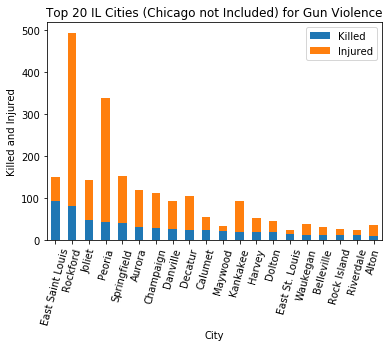

In [59]:
# create stacked bar graph showing number killed and injured in IL cities
guns_IL_city_sum_20_df.plot(kind="bar", stacked="True")

# create plot labels and title
plt.title("Top 20 IL Cities (Chicago not Included) for Gun Violence")
plt.xlabel("City")
plt.ylabel("Killed and Injured")

# angle x ticks labels
plt.xticks(rotation=75);

In [60]:
# generate query to select the sum of those killed and injured between 2014 and 2018, ordered by year
query = 'SELECT Year, sum(Killed), sum(Injured) FROM gunsALL WHERE Year > 2013 AND Year < 2019 GROUP BY Year ORDER BY Year'

# load cursor with results, retrieve query results
cursor = con.execute(query)
all_year = cursor.fetchall()

# create DataFrame with query reseults and add column headers
all_year_df = pd.DataFrame(all_year)
all_year_df.columns = ['Year', 'Killed', 'Injured']

# set Year data type to integer, set the DataFrame index to the Year column, and print entire DataFrame
all_year_df['Year'] = all_year_df['Year'].astype(int)
all_year_df.set_index('Year', inplace=True)
all_year_df

,Killed,Injured
Year,,
2014,12557,23002
2015,13647,27572
2016,15483,31997
2017,15511,30703
2018,3533,6171


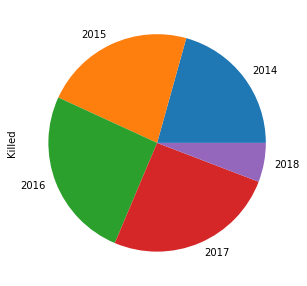

In [61]:
# generate pie chart of counts of those killed by year
plot = all_year_df.plot.pie(y='Killed', figsize=(5, 5), legend = False)

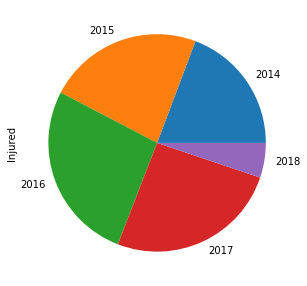

In [62]:
# generate pie chart of counts of those Injured by year
plot = all_year_df.plot.pie(y='Injured', figsize=(5, 5), legend = False)

>> Based on results of these pie charts, the number of those killed and those injured appear to vary equally year to year.

> Upon completion of analysis, there are 9 tables in the database

In [63]:
# retrieve names of tables database after analysis
# generate query of metadata for gunviolence database
query = 'SELECT name from sqlite_master where type= "table"'

# execute query
cursor.execute(query)

# print results of query
print(cursor.fetchall())

[('Month',), ('gunsCSV',), ('gunsWEB',), ('gunsAPI',), ('webSUM',), ('csvSUM',), ('gunsALL',), ('gunsIL',), ('gunsILCity',)]


> References:   

>> GVA. (2020). _Mass Shootings_. Retrieved from Gun Violence Archive: https://www.gunviolencearchive.org/

>> Kaggle. (n.d.). _Gun Violence_. Retrieved from Kaggle: https://www.kaggle.com/jameslko/gun-violence-data/data

>> Kaggle. (2020). _Gun Violence Database_. Retrieved from Kaggle: https://www.kaggle.com/duttadebadri/gun-violence-in-usa-insights-forecast